In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", rc={'figure.figsize':(11,9)})
sns.set_palette('colorblind');
# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# [seaborn distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Flexibly plot a univariate distribution of observations.

This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the
 seaborn [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) and 
 [rugplot()](https://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot) functions. It 
 can also fit scipy.stats distributions and plot the estimated PDF over the data.


#### References:
[Python vs R: Difference in visualization cpmmmands/parameters](https://www.kdnuggets.com/2019/03/r-vs-python-data-visualization.html)


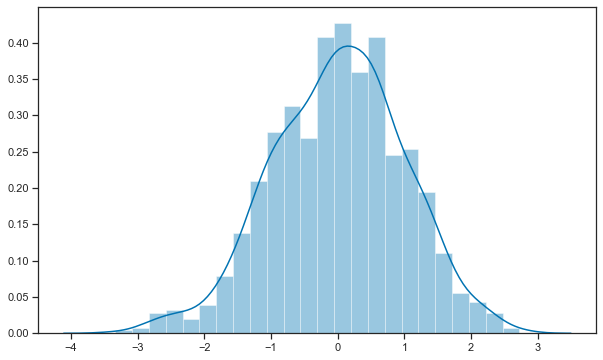

In [2]:
x = np.random.randn(1000)
plt.figure(figsize=(10,6));
sns.distplot(x);

Use Pandas objects to get an informative axis label:

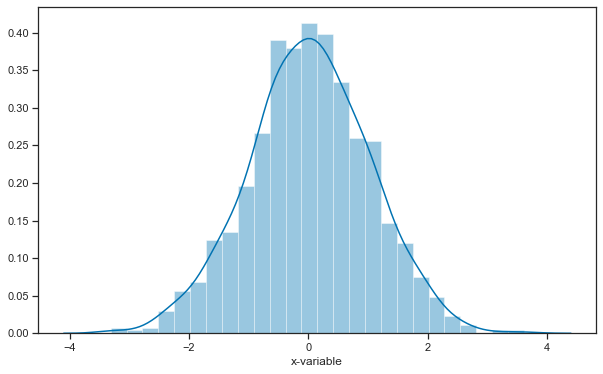

In [3]:
x = pd.Series(np.random.randn(1000), name = 'x-variable')
plt.figure(figsize=(10,6));
sns.distplot(x);

### Plot the distribution with a kernel density estimate only

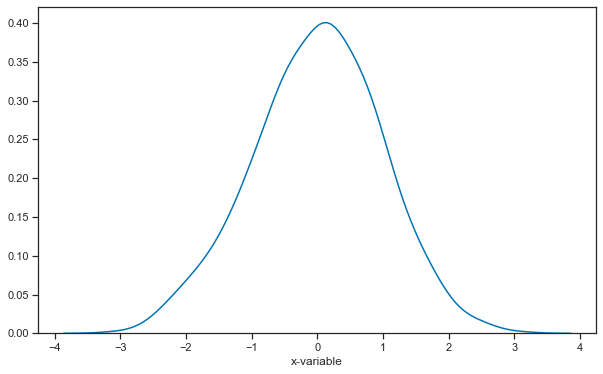

In [4]:
x = pd.Series(np.random.randn(1000), name = 'x-variable')
plt.figure(figsize=(10,6));
sns.distplot(x, hist = False);

### Plot the distribution with a kernel density estimate and rugplot

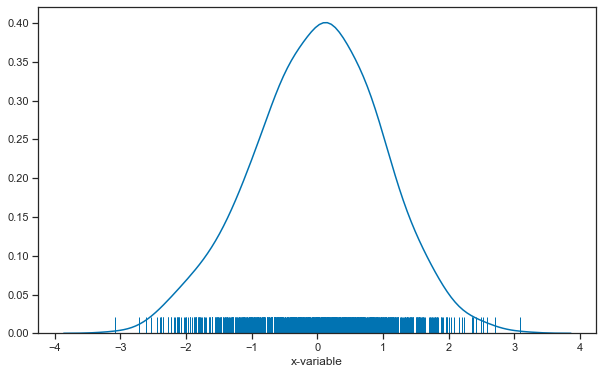

In [5]:
plt.figure(figsize=(10,6));
sns.distplot(x, rug=True, hist=False);

### Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:

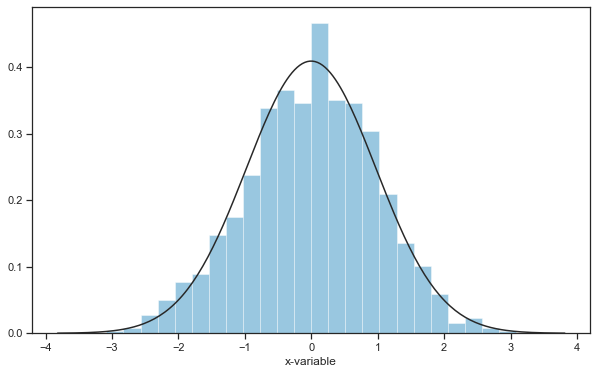

In [6]:
plt.figure(figsize=(10,6));
from scipy.stats import norm
sns.distplot(x, fit=norm, rug=False, kde = False);

### Plot the distribution on the vertical axis:

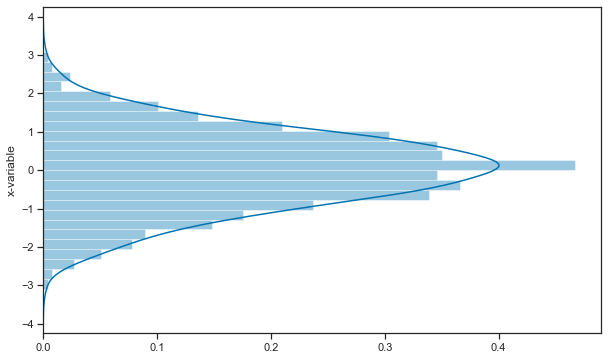

In [7]:
plt.figure(figsize=(10,6));
sns.distplot(x, vertical=True);

### Change the color of all the plot elements:

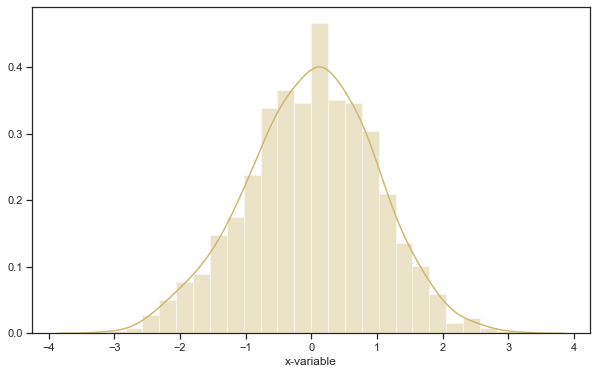

In [8]:
sns.set_color_codes()
plt.figure(figsize=(10,6));
sns.distplot(x, color="y");

### Pass specific parameters to the underlying plot functions:

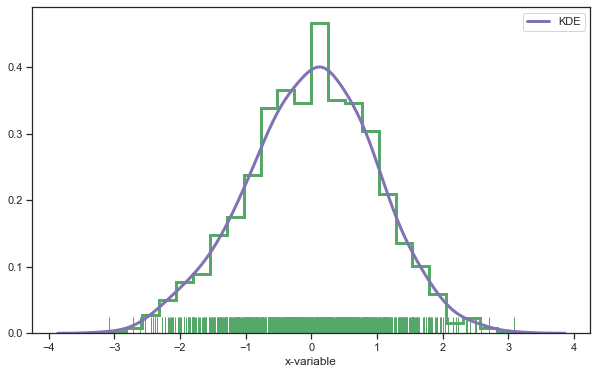

In [9]:
plt.figure(figsize=(10,6));
sns.distplot(x, rug = True, rug_kws = {"color":"g"}, kde_kws = {"color":"k", "lw":3, "label":"KDE", "color":"m"},
             hist_kws = {"histtype":"step", "linewidth":3, "alpha": 1, "color": "g"});

### Plotting a histogram and limiting and adjusting its axis-values

In [10]:
df = pd.read_csv("pseudo_facebook.tsv", sep = '\t')
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


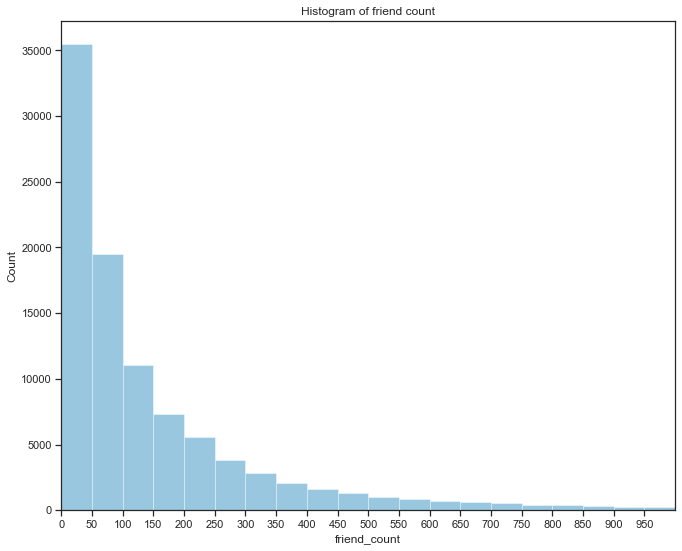

In [11]:
sns.distplot(df['friend_count'], kde = False, bins = np.arange(0, 5000, 50)); # binwidth adjusted using bins
plt.ylabel("Count");
plt.xlim((0,1000));
plt.xticks(list(range(0,1000,50))); # breaking x-axis into 50 units step. similar to breaks() in R's ggplot2
plt.title("Histogram of friend count");

Adjusting the edgecolor and fill color of the histogram  

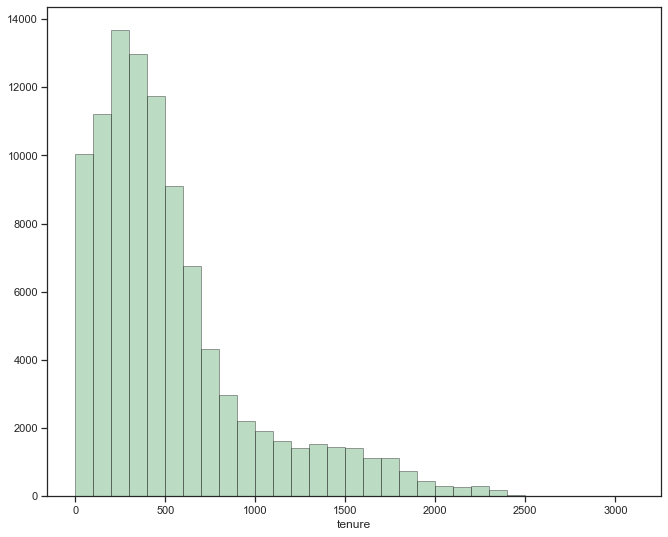

In [12]:
sns.distplot(df['tenure'], bins = np.arange(0,3200,100), kde = False, hist_kws = {'edgecolor':'k', 'color':'g'});

### Comparing the 5-point summary (`describe()`) and the plots

In [13]:
df.groupby('gender')['friend_count'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,40254.0,241.969941,476.039706,0.0,37.0,96.0,244.0,4923.0
male,58574.0,165.035459,308.466702,0.0,27.0,74.0,182.0,4917.0


Observe here that the male gender has more friend count than the female gender.

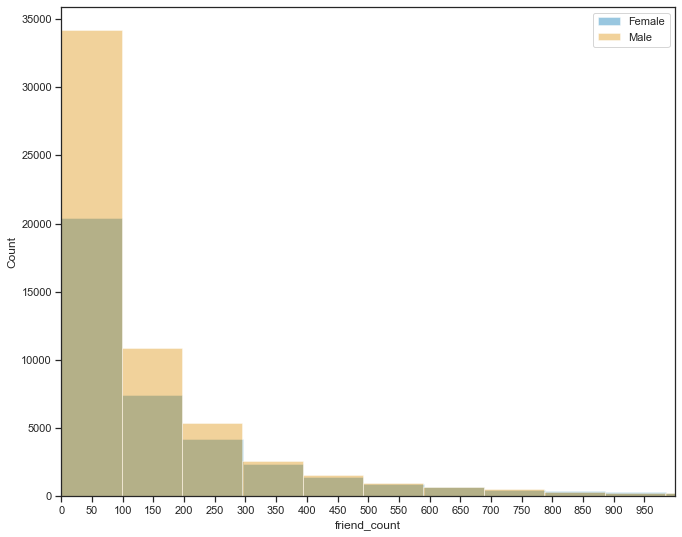

In [14]:
fig,ax = plt.subplots()
sns.distplot(df.loc[df['gender']=='female','friend_count'], kde = False, hist=True,ax = ax, label = 'Female');
sns.distplot(df.loc[df['gender']=='male', 'friend_count'], kde = False, hist=True,ax = ax, label = 'Male');
plt.ylabel("Count");
plt.xlim((0,1000));
plt.xticks(list(range(0,1000,50)));
plt.legend();
plt.show();
ax.set_title("Histogram of friend_count genderwise");

Even though the male have higher percentage of friend_counts than that of females but from the gaph above we can observe that many males have a low %ge of friend_count.